<a href="https://colab.research.google.com/github/2203a52148/DAUP/blob/main/2203a52148_daup_lab1_1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/content/insurance.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
data.isnull().sum()/len(data)*100

,0
age,0.0
sex,0.0
bmi,0.0
children,0.0
smoker,0.0
region,0.0
expenses,0.0


In [9]:
data = data.dropna()

In [10]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [11]:
num = data.select_dtypes(['int64','float64'])
correlation_martix = num.corr()
correlation_martix

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<Axes: >

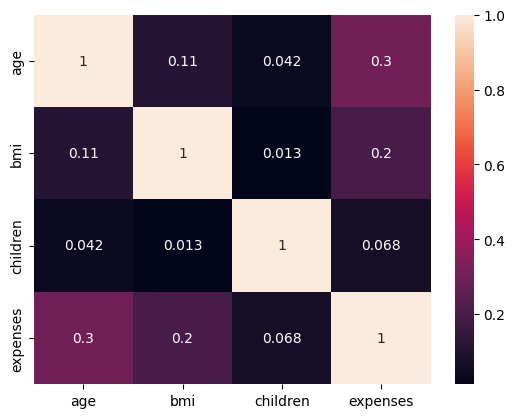

In [12]:
sns.heatmap(correlation_martix , annot = True  )

In [13]:
for i in data.columns:
  x = data[i].value_counts()
  print(x)
  print()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

sex
male      676
female    662
Name: count, dtype: int64

bmi
27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
39.0     1
40.8     1
20.3     1
18.5     1
53.1     1
Name: count, Length: 275, dtype: int64

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

expenses
1639.56     2
16884.92    1
29330.98    1
2221.56     1
19798.0

In [14]:
cat = data[['sex', 'children' , 'smoker' , 'region']]
cat

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


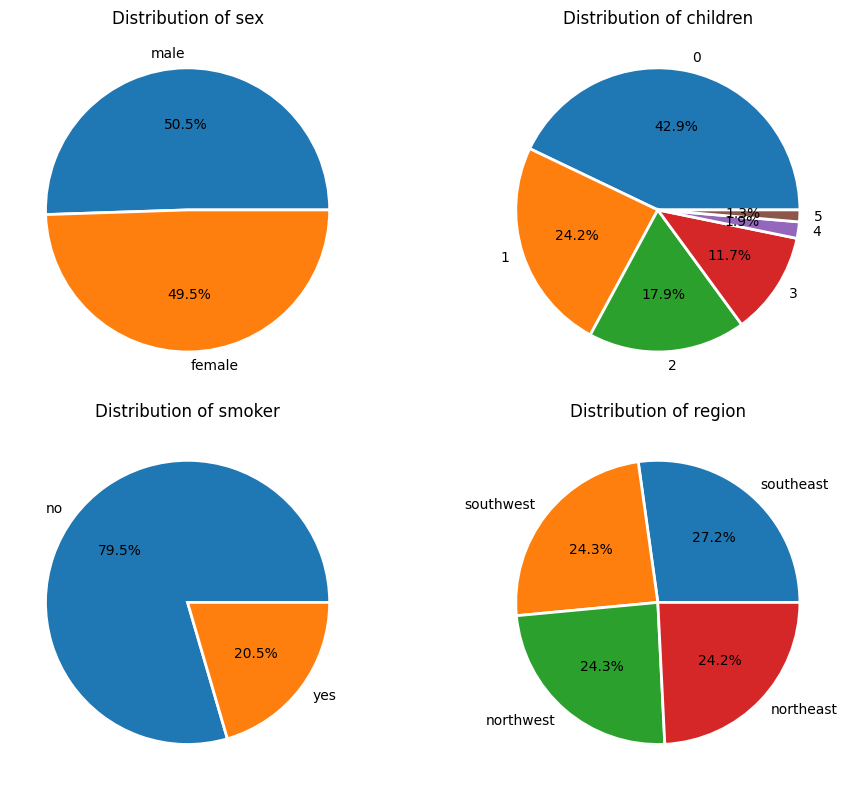

In [15]:
n_cols = len(cat.columns)
fig, axes = plt.subplots(nrows=2 , ncols=2, figsize=(10, 8))  # Adjust rows and columns as needed

# Flatten axes for easy indexing if there are multiple rows
axes = axes.flatten()

for i, col in enumerate(cat.columns):
    x = cat[col].value_counts()
    axes[i].pie(x, labels=x.index, autopct='%1.1f%%' , wedgeprops={"linewidth":2 , "edgecolor": "white"})
    axes[i].set_title(f"Distribution of {col}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<Axes: xlabel='sex'>

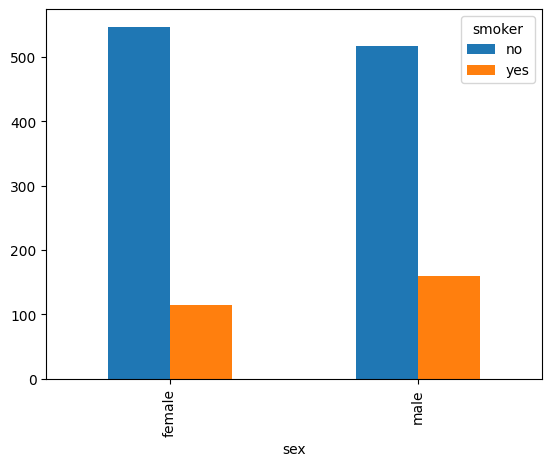

In [16]:
Gender = pd.crosstab(data['sex'], data['smoker'])
Gender.plot(kind='bar')

<Axes: ylabel='Frequency'>

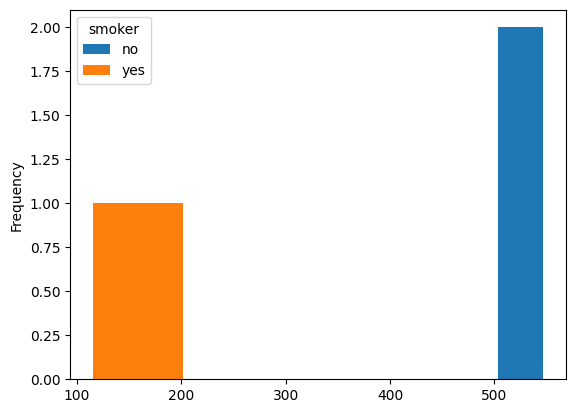

In [17]:
Gender.plot(kind='hist')

<Axes: >

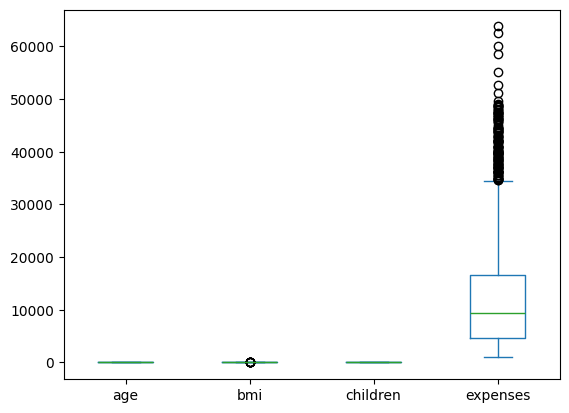

In [18]:
data.plot(kind = 'box')

In [19]:
num

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


In [20]:
smokers = data[(data['smoker'] == "yes")]
non_smoker = data[(data.smoker == "no")]

In [21]:
smokers

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
11,62,female,26.3,0,yes,southeast,27808.73
14,27,male,42.1,0,yes,southeast,39611.76
19,30,male,35.3,0,yes,southwest,36837.47
23,34,female,31.9,1,yes,northeast,37701.88
...,...,...,...,...,...,...,...
1313,19,female,34.7,2,yes,southwest,36397.58
1314,30,female,23.7,3,yes,northwest,18765.88
1321,62,male,26.7,0,yes,northeast,28101.33
1323,42,female,40.4,2,yes,southeast,43896.38


In [22]:
non_smoker

,age,sex,bmi,children,smoker,region,expenses
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
...,...,...,...,...,...,...,...
1332,52,female,44.7,3,no,southwest,11411.69
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83


<Axes: xlabel='age', ylabel='expenses'>

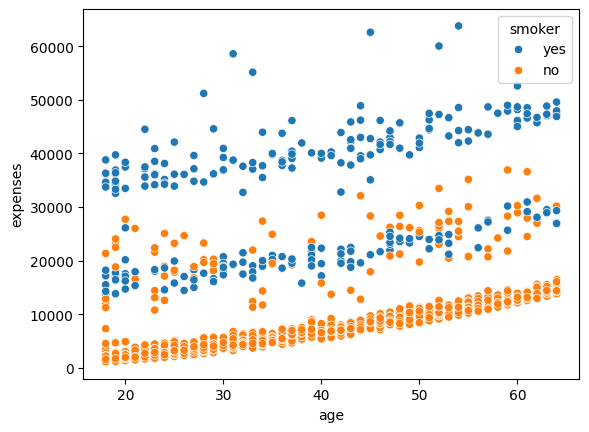

In [23]:
sns.scatterplot(data = data , x = 'age' , y = 'expenses' , hue='smoker')

In [ ]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000
